<h1>Machine Learning Internship | Navia Life Care</h1>

Name: Uma T V

Email: uma.tv1699@gmail.com

Roll No: ME17B170

Institute: Indian Institute of Technology Madras

<h2>Part 2 out of 3</h2>

<h3> 02 Training_Split_Numbers_PCA_SVM </h3>
<p style="color:blue"> This program inputs the split processed individual numbers information (output of program 1) and uses that to learn and predict numbers from split number images</p>

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import sklearn 
import statsmodels.api as sm
from sklearn.cluster import k_means
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [2]:
# Reading the split and processed individual numbers pixel information

train=pd.read_csv('split_train.csv')

In [3]:
# Seprating into pixel values (features) and labels

y_train=train['120']
x_train=train.drop('120',axis=1)

<p style="color:blue">We now use PCA to identify the most useful components from the features to identify the label of the numbers</p>

In [4]:
# Implementing PCA to determine the required number of components

pca=PCA(random_state=42)
pca.fit_transform(x_train,y_train)
cumulative=np.cumsum(pca.explained_variance_ratio_)

In [5]:
# visualizing the cumulative sum of variance ratios to identify the number of principal components to be used

cumulative

array([0.86481392, 0.90725803, 0.94729816, 0.96748124, 0.9825606 ,
       0.99233772, 0.9995405 , 0.99970831, 0.99979805, 0.99987525,
       0.99992838, 0.99997462, 0.99999974, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

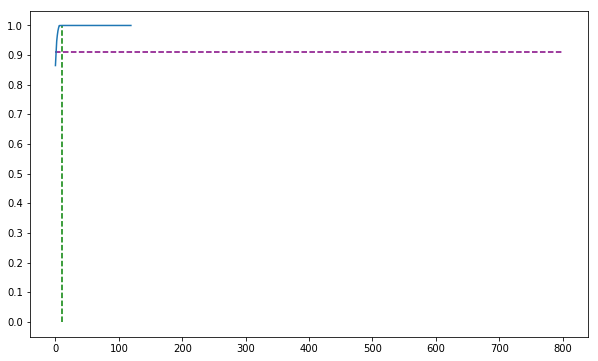

In [6]:
# Visualizing the relevant number of features

fig = plt.figure(figsize=[10,6])
plt.vlines(x=10, ymax=1, ymin=0, colors="g", linestyles="--")
plt.hlines(y=0.91, xmax=800, xmin=0, colors="purple", linestyles="--")
sns.lineplot(y=cumulative,x=range(len(cumulative)))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [7]:
# Based on the above graph, 14 components are taken

pca=IncrementalPCA(n_components=10)
x_train_pca=pca.fit_transform(x_train)

In [8]:
x_train_final=pd.DataFrame(x_train_pca)

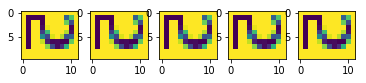

In [9]:
# Visualining the data with label 5 

img_five = train.loc[train['120']==5].head(5).index.values

for i in range(0,5):
    one = train.iloc[img_five[i], :-1]
    one = one.values.reshape((10,12))
    plt.subplot(1,5,i+1)
    plt.imshow(one)

In [10]:
# Using a 3-fold approach

folds=KFold(n_splits=3,shuffle=True,random_state=42)
params = {"C": [1, 5, 10, 100]}

# Using a support vector model

model = SVC()

# Grid search scheme is used with 3 folds, using a Support Vector Model to determine best parameter
# Train Accuracy is used as the measurement metric

model_cv = GridSearchCV(estimator = model, param_grid = params, scoring= 'accuracy', 
                        cv = folds, verbose = 1, return_train_score=True)      

In [11]:
# Fitting the model to the data

model_cv.fit(x_train_final, y_train)  

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.3s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [1, 5, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [12]:
# visualizing the results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.418769,0.005880,0.149573,0.009554,1,{'C': 1},0.317805,0.439056,0.544061,0.433641,0.092448,4,0.344718,0.449410,0.567645,0.453924,0.091066
1,0.195378,0.018805,0.122669,0.007091,5,{'C': 5},0.880664,0.996171,0.998084,0.958306,0.054907,3,0.891797,0.998085,0.997447,0.962443,0.049955
2,0.102739,0.013350,0.078137,0.009259,10,{'C': 10},0.996809,0.996171,0.998084,0.997022,0.000795,1,0.998723,0.998085,0.997447,0.998085,0.000521
3,0.016931,0.001629,0.009321,0.001230,100,{'C': 100},0.996809,0.996171,0.998084,0.997022,0.000795,1,0.998723,0.998085,0.997447,0.998085,0.000521


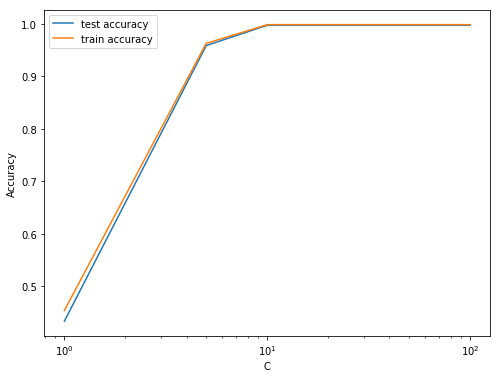

In [13]:
# plot of C versus train and test scores, to visualize the best C

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [14]:
# Best C value and accuracy

best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9970215027209504 at C = 10


In [15]:
# Making predictions on the training data using the obtained model

test_predict = model_cv.predict(pd.DataFrame(x_train_pca))

In [16]:
# Tabulating the predictions and comparing with the expected results

Training_Predictions = pd.DataFrame()
Training_Predictions['Expected']=train["120"]
Training_Predictions['Predicted']=test_predict
Training_Predictions.index.name = "Id"

In [17]:
Training_Predictions

,Expected,Predicted
Id,,
0,1,1
1,1,1
2,1,1
3,1,1
4,4,4
...,...,...
4695,9,9
4696,9,9
4697,9,9


In [18]:
# visualizing the wrongly predicted numbers

Training_Predictions.loc[Training_Predictions["Expected"]!=Training_Predictions["Predicted"]]

,Expected,Predicted
Id,,
202,1,9
203,9,3
204,3,1
801,4,5
2942,5,9
2943,9,5
2970,6,9
4088,8,4
4279,6,1


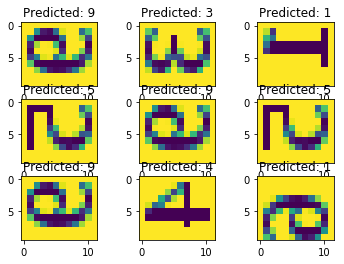

In [19]:
# visualizing the wrongly predicted numbers 

k=0
for i in [202,203,204,801,2942,2943,2970,4088,4279]:
    one = train.iloc[i, :-1]
    one = one.values.reshape(10,12)
    plt.subplot(3,3,k+1)
    plt.title("Expected: "+str(Training_Predictions["Expected"][i]))
    plt.imshow(one)
    plt.title("Predicted: "+str(Training_Predictions["Predicted"][i]))
    k=k+1

<p style="color:blue">From this visualization, it can be clearly seen that the prediction accuracy is actually higher than the indicated 0.9970215027209504 and that there are a few naming mistakes in the electoral-tagged folder images given to us</p>